# **<center> Введение в Python </center>**
## **<center> Домашнее Задание 4 </center>**

В этом домашнем задании Вам предстоит поработь с данными по магазинным продажам. Вам предстоит выполнить ряд аналитических задач, а также визуализировать некоторые результаты.

Данные взяты [отсюда](https://www.kaggle.com/ndarshan2797/english-converted-datasets?select=item_categories.csv)

Описание полей в данных следующее:

* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* category_id - unique identifier of category
* item_cnt_day - number of products sold. 
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,…, October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* category_name - name of category

### **Задание 1.**

* Прочтите файл **sales.csv** с помощью **Pandas**
* Покажите случайные 3 наблюдения
* Покажите 4 последних наблюдения
* Сколько наблюдений в данных?


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/sales_train.csv')

df.sample(3)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
592352,15.06.2013,5,19,16793,3199.0,1.0
1354427,12.01.2014,12,27,12467,2899.0,1.0
187410,11.02.2013,1,31,21785,299.0,1.0


In [ ]:
df.tail(4)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [ ]:
print(f'Data frame contains {df.shape[0]} raws')
print(df.shape)

Data frame contains 2935849 raws
(2935849, 6)


### **Задание 2.**

Уберите из данных по продажам те наблюдения, у которых число покупок и цена меньше 0

In [ ]:
indexes_to_drop = df [ (df['item_cnt_day']<0) | (df['item_price']<0) ].index
df.drop(indexes_to_drop, inplace = True)
print(f'Cleaned data frame contains {df.shape[0]} raws')


Cleaned data frame contains 2928492 raws


### **Задание 3.**

Для полей цены и числа, купленного товара покажите описательную статистику (summary statistics)

In [ ]:
df[['item_price', 'item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.928492e+06,2.928492e+06
mean,8.894668e+02,1.248337e+00
std,1.727499e+03,2.619586e+00
min,7.000000e-02,1.000000e+00
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


### **Задание 4.**

Выведите число уникальных магазинов и число уникальных предметов

In [ ]:
n_unique_shops = df['shop_id'].nunique()
n_unique_items = df['item_id'].nunique()

print(f'Number of unique shops is {n_unique_shops}')
print(f'Number of unique items is {n_unique_items}')

Number of unique shops is 60
Number of unique items is 21804


### **Задание 5.**

Переведите колонку с датой в формат **datetime.date** (Вам потребуется библиотека **datetime** и одноименной модуль из нее же; также Вам потребуется метод `.apply()` с лямбда выражением внутри)

In [ ]:
from datetime import datetime as dt

In [ ]:
df['date'] = df['date'].apply(lambda x: dt.strptime(x, '%d.%m.%Y')) 

df['date'] = df['date'].apply(lambda x: dt.date(x))

In [ ]:
df.sample(5)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1910641,2014-08-20,19,17,5660,1590.0,1.0
2341973,2015-01-14,24,25,12090,399.0,1.0
2614073,2015-05-24,28,18,7843,1599.0,1.0
234196,2013-03-09,2,42,1470,699.0,2.0
2658382,2015-05-16,28,46,2884,999.0,1.0


### **Задание 6.**

Создайте переменную **mdate**, путем замены дня даты на первое число (по сути, дата из месяца и года). Тип значений этого поля должен быть **datetime.date** (можете проверить применением метода `type()` к элементу этого поля)

**hint**: Вам может пригодиться метод `.replace()`, который можно взять от значения с типом **datetime.date**

In [ ]:
df['mdate']=df['date'].apply(lambda x: x.replace(day = 1))
print(type(df['mdate'][0]))
df.head()


<class 'datetime.date'>


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mdate
0,2013-01-02,0,59,22154,999.00,1.0,2013-01-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01-01
5,2013-01-10,0,25,2564,349.00,1.0,2013-01-01


### **Задание 7.**

Создайте переменную **item_gi** (item gross income) путем умножения цены товара и его купленного количества

In [ ]:
df['item_gi'] = df['item_price']*df['item_cnt_day']
df.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mdate,item_gi
2337641,2015-01-28,24,10,20614,699.00,1.0,2015-01-01,699.00
1296819,2014-01-19,12,35,11593,999.00,1.0,2014-01-01,999.00
1444256,2014-02-20,13,37,2445,399.44,1.0,2014-02-01,399.44
1500679,2014-03-21,14,25,1921,249.00,1.0,2014-03-01,249.00
2748584,2015-07-20,30,50,15423,0.99,1.0,2015-07-01,0.99


### **Задание 8.**

Нарисуйте гистограмму распределения переменной **item_gi**

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

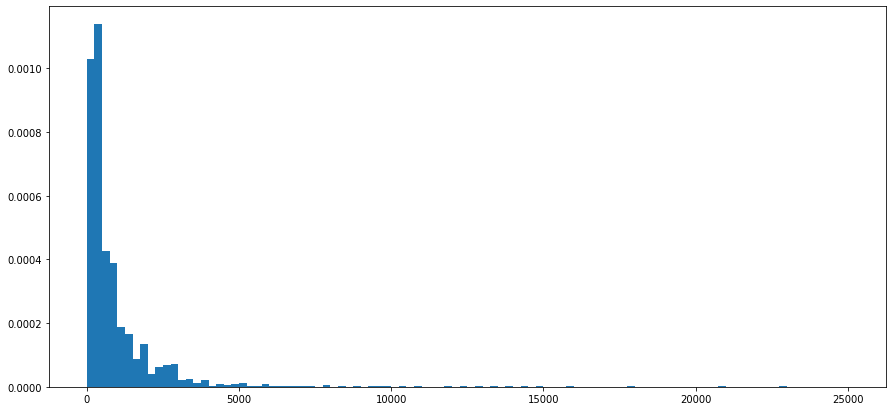

In [ ]:
fig = plt.figure(figsize = (15, 7))
plt.hist(df['item_gi'], range = [0, 25000], bins = 100, density = True)
plt.show()


### **Задание 9.**

* Посчитайте сумму по **item_gi** по дням (date) и магазинам (shop_id) (Вам понадобится выражение `.groupby()`) (т.е. суммарные продажи на дату по магазинам)
* Посчитайте сумму по **item_gi** по дням (date) (т.е. суммарные продажи на дату среди всех магазинов)

Для каждого результата расчетов, Вы должны записать их в переменные. Также примените `.reset_index(name = ..)` к полученным результатам, указав новое имя.

In [ ]:
income_on_date_shops = df.groupby(['date', 'shop_id'])['item_gi'].sum().reset_index(name = 'income_on_date_shops')
income_on_date_shops

,date,shop_id,income_on_date_shops
0,2013-01-01,2,31886.0
1,2013-01-01,7,59993.0
2,2013-01-01,8,44516.0
3,2013-01-01,13,6043.0
4,2013-01-01,14,48847.0
...,...,...,...
47212,2015-10-31,55,84224.0
47213,2015-10-31,56,53264.0
47214,2015-10-31,57,109630.0
47215,2015-10-31,58,92939.0


In [ ]:
income_on_date_total = df.groupby('date')['item_gi'].sum().reset_index(name='income_on_date_total')
income_on_date_total
df_1 = income_on_date_total
df_1

,date,income_on_date_total
0,2013-01-01,1371116.50
1,2013-01-02,6070414.01
2,2013-01-03,5460386.50
3,2013-01-04,4769843.50
4,2013-01-05,4600005.40
...,...,...
1029,2015-10-27,2266689.13
1030,2015-10-28,1726194.10
1031,2015-10-29,1860141.14
1032,2015-10-30,2623504.12


### **Задание 10.**

Постройте график динамики суммарных продаж по дням. По оси X - даты, по оси Y - суммарные продажи (суммарно по всех магазинам; Вам потребуется второй результат расчетов из задания 9)

На график добавьте сетку, название, а также подписи осей. Тип линии сделайте штрихованным. Толщину линии задайте 2. Не забудьте задать размер шрифта у подписей осей, названий, а также у деления осей.

График сохраните в формате **pdf**

**hint** - для всей эстетики лучше освежить семинар

In [ ]:
import matplotlib as mpl

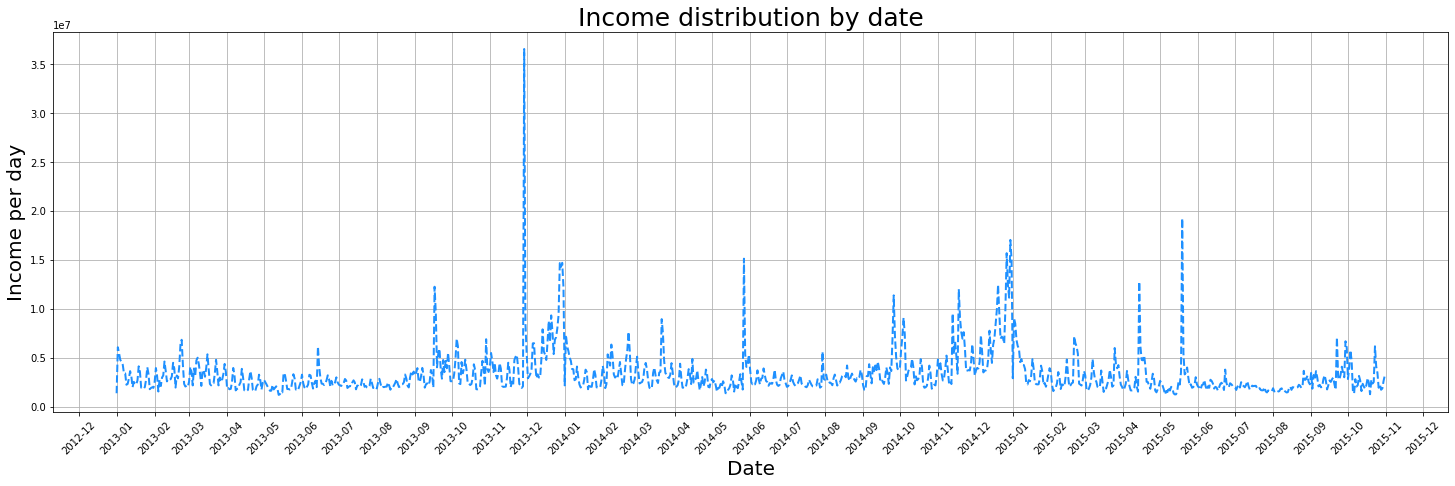

In [ ]:
fig = plt.figure(figsize = (25, 7))
plt.plot(df_1['date'], df_1['income_on_date_total'], linestyle = 'dashed', linewidth = 2, color = 'dodgerblue')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Income per day', fontsize = 20)
plt.title('Income distribution by date', fontsize = 25)
plt.grid(axis = 'both')
fig.axes[0].xaxis.set_major_locator(mpl.dates.MonthLocator(interval = 1))
plt.xticks(rotation = 45)
plt.savefig('income.pdf')
plt.show()


### **Задание 11.**

Присоедините результаты расчетов из задания 9 к таблице по продажам.

Тип соединения - **left**

Поля, по которым соединять:
* для первого результата: date, shop_id
* для второго результата: date

Создайте переменную отношения суммы продаж на дату в магазине к продажам на дату по всем магазинам.



In [ ]:
# df = df.merge(income_on_date_shops, how = 'left', on = ['date', 'shop_id'])
# df = df.merge(income_on_date_total, how = 'left', on = 'date')
# df = df.drop(columns = 'income_by_days')

df['shop_income_by_date'] = df['income_on_date_shops'] / df['income_on_date_total']
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mdate,item_gi,income_on_date_shops,income_on_date_total,shop_income_by_date
0,2013-01-02,0,59,22154,999.00,1.0,2013-01-01,999.00,146080.0,6070414.01,0.024064
1,2013-01-03,0,25,2552,899.00,1.0,2013-01-01,899.00,249570.0,5460386.50,0.045706
2,2013-01-06,0,25,2554,1709.05,1.0,2013-01-01,1709.05,273742.0,4288608.00,0.063830
3,2013-01-15,0,25,2555,1099.00,1.0,2013-01-01,1099.00,166286.0,2533773.00,0.065628
4,2013-01-10,0,25,2564,349.00,1.0,2013-01-01,349.00,164756.0,2320067.00,0.071013


### **Задание 12.**

Постройте график распределения переменной из задания 11. Используйте библиотеку **seaborn**. Не забывайте про название графика и подписи осей, а также про размер их шрифта, а также размер шрифта делений осей. Сетка **не** нужна.


In [ ]:
import seaborn as sns

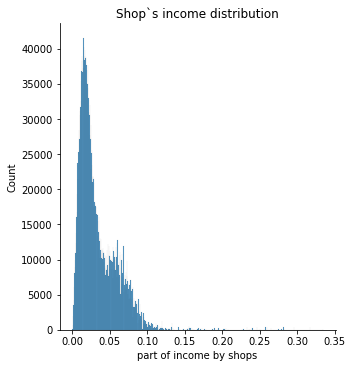

In [ ]:
sns.displot(df['shop_income_by_date']).set(title='Shop`s income distribution', xlabel = 'part of income by shops')

### **Задание 13.**

К таблице с продажами присоедините таблицы **items** и **item_categories**. Поля, по которым нужно проводить соединение, Вы должны понять сами.


In [ ]:
df_items = pd.read_csv('/content/items.csv')
df_item_categories = pd.read_csv('/content/item_categories.csv')
df_items.columns
df_item_categories.columns
df_item_categories.rename(columns = {'item_category_id':'category_id'}, inplace = "True")
# df_item_categories.head()
df = df.merge(df_items, how = 'left', on = 'item_id')
df = df.merge(df_item_categories, how = 'left', on = 'category_id')
df.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mdate,item_gi,income_on_date_shops,income_on_date_total,shop_income_by_date,item_name,category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,2013-01-01,999.00,146080.0,6070414.01,0.024064,SCENE 2012 (BD),37,Cinema - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,2013-01-01,899.00,249570.0,5460386.50,0.045706,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl
2,2013-01-06,0,25,2554,1709.05,1.0,2013-01-01,1709.05,273742.0,4288608.00,0.063830,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl
3,2013-01-15,0,25,2555,1099.00,1.0,2013-01-01,1099.00,166286.0,2533773.00,0.065628,DEEP PURPLE 30 Very Best Of 2CD (Businesses).,56,Music - CD of corporate production
4,2013-01-10,0,25,2564,349.00,1.0,2013-01-01,349.00,164756.0,2320067.00,0.071013,DEEP PURPLE Perihelion: Live In Concert DVD (C...,59,Music - Music video


### **Задание 14.**

В получившейся таблице создайте колонку/переменную **cat_name_trim**, взятием первого слова из колонки **category_name**. 

**hint** - вспомните про работы со строками. Вам нужно взять первым элемент после разбиения строки с помощью определенного разделителя. Про метод `.apply()` тоже лучше не забывать.


In [ ]:
def take_first_word(smth):
    first_word = smth.split('-')[0].strip()
    return first_word
df['cat_name_trim'] = df['item_category_name'].apply(lambda x: take_first_word(x))
df.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,mdate,item_gi,income_on_date_shops,income_on_date_total,shop_income_by_date,item_name,category_id,item_category_name,cat_name_trim
2504507,2015-03-11,26,52,3753,599.0,1.0,2015-03-01,599.0,62183.0,2016316.66,0.030840,"Gray Goo [PC, Jewel, Russian subtitles]",30,PC Games - Standard Editions,PC Games
2068407,2014-10-21,21,58,10435,399.0,1.0,2014-10-01,399.0,42418.0,1933261.17,0.021941,GODZILLA,40,Cinema - DVD,Cinema
1298636,2014-01-15,12,28,2678,999.0,1.0,2014-01-01,999.0,78215.0,2113829.00,0.037002,Dance Central 2 - MSX Xbox 360 Russian Russia ...,23,Games - XBOX 360,Games
1315472,2014-01-19,12,41,12817,149.0,1.0,2014-01-01,149.0,85486.0,3550948.32,0.024074,CORPORATION OF MONSTERS (region),40,Cinema - DVD,Cinema
876145,2013-09-15,8,15,8092,149.0,1.0,2013-09-01,149.0,72732.0,3145123.00,0.023125,AVATAR,40,Cinema - DVD,Cinema
1906327,2014-08-06,19,17,13888,349.0,1.0,2014-08-01,349.0,21482.0,2386137.00,0.009003,Leps GRIGORY Gangster №1 (firms.),55,Music - CD of local production,Music
1052851,2013-11-04,10,31,17137,149.0,2.0,2013-11-01,298.0,206302.0,3538408.00,0.058304,ADVERSE EFFECT (region),40,Cinema - DVD,Cinema
2072119,2014-10-04,21,49,16002,1299.0,1.0,2014-10-01,1299.0,80022.0,9084321.38,0.008809,Board game 500 evil cards,64,Gifts - Board games,Gifts
2566925,2015-04-26,27,25,13104,399.0,1.0,2015-04-01,399.0,159217.0,2902034.20,0.054864,Card game Fly swatter art.GC001,65,Gifts - Board games (compact),Gifts
2853755,2015-09-13,32,5,1572,499.5,1.0,2015-09-01,499.5,51808.0,2643275.39,0.019600,Assassin's Creed: Revelations (Essentials) [PS...,19,Games - PS3,Games


### **Задание 15.**

В получившейся таблице создайте колонку/переменную **cat_name_trim**, взятием первого слова из колонки **category_name**. 

**hint** - вспомните про работы со строками. Вам нужно взять первым элемент после разбиения строки с помощью определенного разделителя. Про метод `.apply()` тоже лучше не забывать.

Посчитайте число уникальных значений в новой переменной.


In [ ]:
# Задание частично дублирует предыдущее, выполняю только новое - последнее предложение.

unique_cat_name_trim = len(df['cat_name_trim'].unique())
unique_cat_name_trim

21

### **Задание 16.**

На каждый месяц (**mdate**) посчитайте сумму **item_gi** (по всем магазинам). Сохраните результат вычисления в переменную.

In [ ]:
month_income = df.groupby('mdate')['item_gi'].sum().reset_index(name = 'income_total')
month_income

,mdate,income_total
0,2013-01-01,9.239909e+07
1,2013-02-01,9.096449e+07
2,2013-03-01,1.052654e+08
3,2013-04-01,6.945713e+07
4,2013-05-01,6.525317e+07
5,2013-06-01,7.976249e+07
6,2013-07-01,6.953452e+07
7,2013-08-01,7.458699e+07
8,2013-09-01,1.193180e+08
9,2013-10-01,1.075958e+08


### **Задание 17.**

Постройте рисунок, состоящий из 2-х графиков. Разместите эти графики горизонтально (**hint**: используйте `plt.subplots(nrows = 1, ncols = 2, ..)`)

* 1-й график - динамика месячных продаж по всем магазинам (результат расчетов из задания 16)
* 2-й график - **boxplot** график, где по X - **cat_name_trim**, а по Y - **item_gi**

На каждом графике должно быть название, а также подписи осей. Также подберите размер шрифта названий и подписей осей, а также размер шрифта делений осей.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'categories')

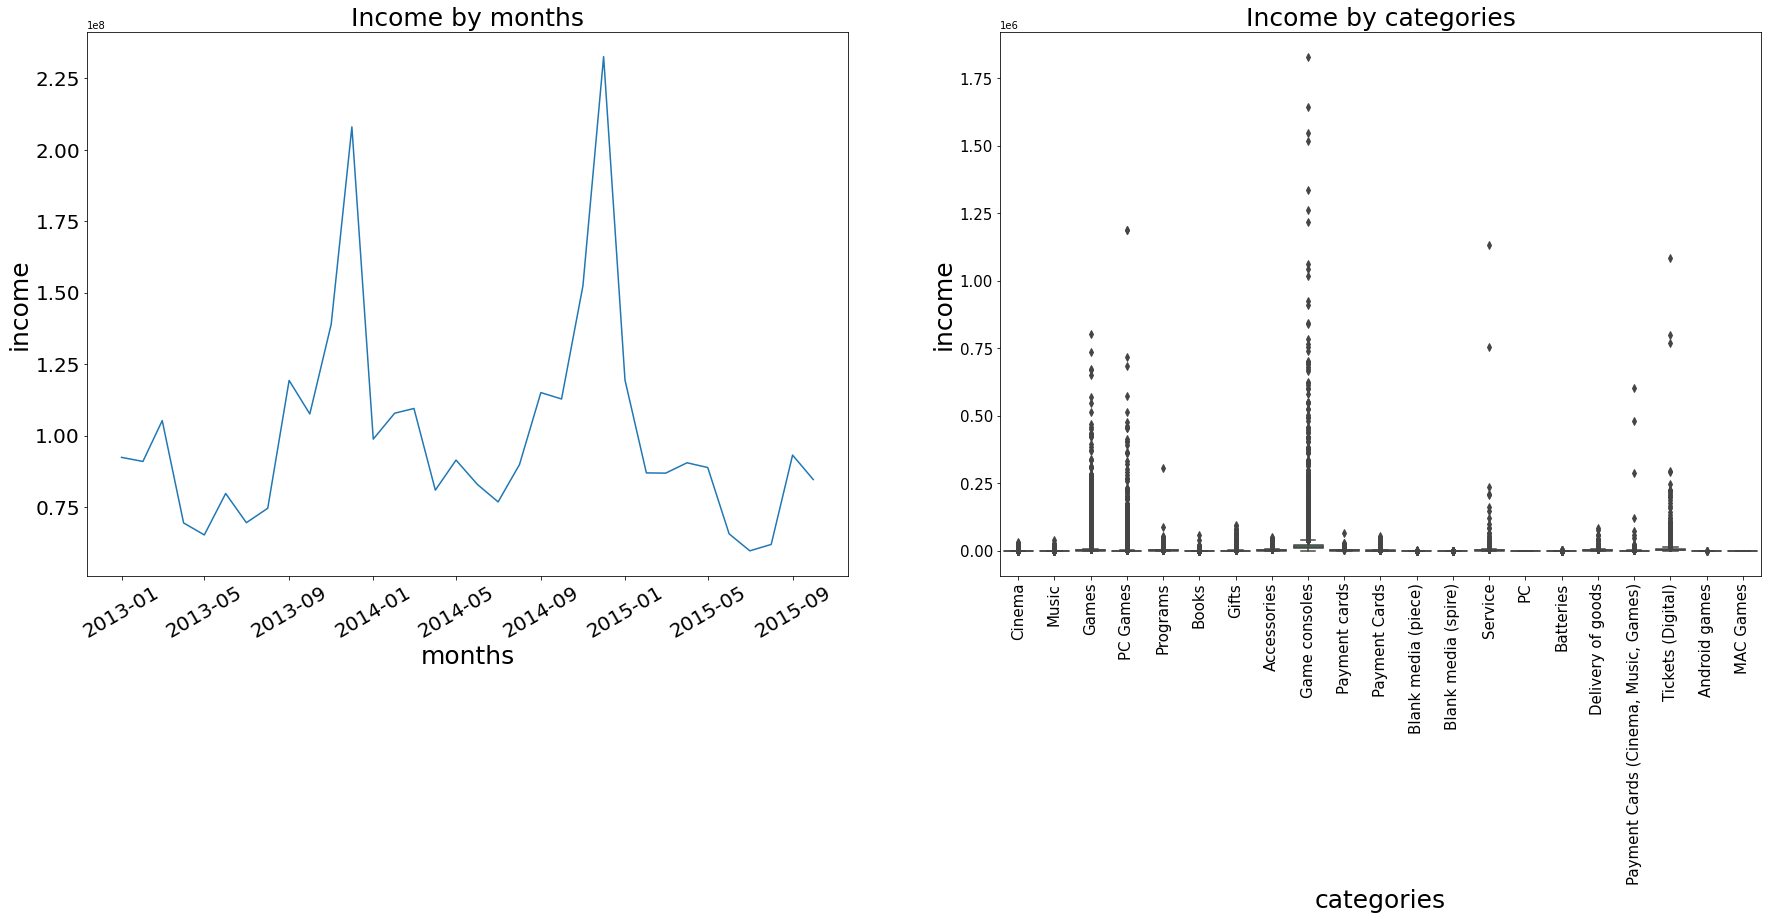

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

sns.lineplot(month_income['mdate'], month_income['income_total'], ax = ax[0])
ax[0].set_title('Income by months', fontsize = 25)
ax[0].tick_params(labelsize = 20)
ax[0].xaxis.set_tick_params(rotation = 30)
ax[0].set_ylabel('income', fontsize = 25)
ax[0].set_xlabel('months', fontsize = 25)

sns.boxplot(x = df['cat_name_trim'], y = df['item_gi'], ax = ax[1])
ax[1].set_title('Income by categories', fontsize = 25)
ax[1].tick_params(labelsize = 15)
ax[1].xaxis.set_tick_params(rotation = 90)
ax[1].set_ylabel('income', fontsize = 25)
ax[1].set_xlabel('categories', fontsize = 25)

